In [1]:
## Notebook env: seuratdisk (R kernel)
## this notebook converts seurat reference dataset to raw counts and also makes a csv file of cell annotations

In [1]:
library(Seurat)
library(SeuratDisk)
library(Matrix)

Attaching SeuratObject

Attaching sp

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



In [3]:
new_ref <- readRDS('/home/ssobti/projects/farnaz_spatial/data/new_ref/mouse_new_ref.rds')

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



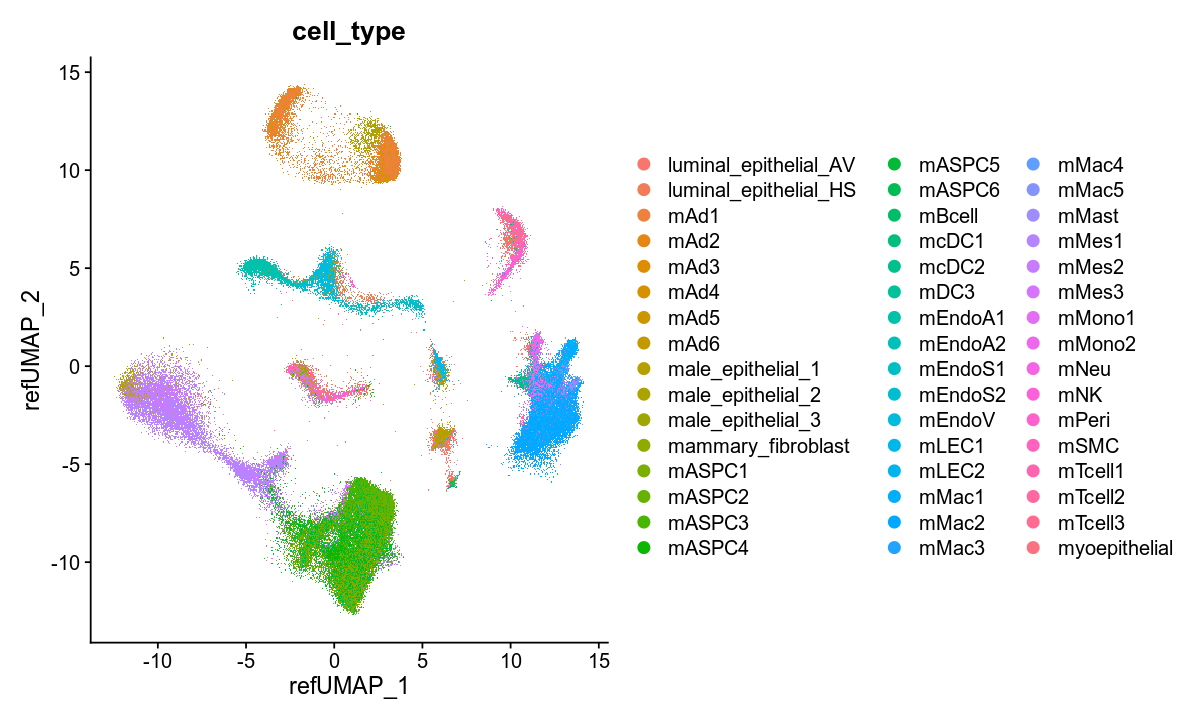

In [4]:
options(repr.plot.width = 10, repr.plot.height = 6)
DimPlot(new_ref, group.by = 'predicted.celltype')

In [5]:
raw_counts = new_ref@assays$RNA@counts

In [6]:
meta = new_ref@meta.data

In [ ]:
seurat_temp = CreateSeuratObject(raw_counts, meta.data = meta)

In [7]:
colnames(meta)

[1] "orig.ident"             "nCount_RNA"             "nFeature_RNA"          
 [4] "name"                   "species"                "technology"            
 [7] "compartment"            "sample"                 "tissue"                
[10] "depot"                  "age"                    "diet"                  
[13] "animal"                 "weight"                 "sex"                   
[16] "feeding"                "spliced.percent"        "unspliced.percent"     
[19] "splicing.ratio"         "scrub"                  "scrub_score"           
[22] "nGene"                  "nUMI"                   "mt.percent"            
[25] "ribo.percent"           "nCount_SCT"             "nFeature_SCT"          
[28] "s.score"                "g2m.score"              "phase"                 
[31] "integrated_snn_res.0.3" "seurat_clusters"        "tree.ident"            
[34] "cell_type"              "cell_type2"             "ct3"                   
[37] "predicted.celltype"

In [8]:
cell_annotations = data.frame(cell_id = rownames(meta), cell_type = meta$predicted.celltype)

In [9]:
writeMM(raw_counts, '/home/ssobti/projects/farnaz_spatial/data/new_ref/mouse_new_ref.mtx')

NULL

In [10]:
setwd('/home/ssobti/projects/farnaz_spatial/data/new_ref')

In [11]:
SaveH5Seurat(seurat_temp, filename = "raw_ref.h5Seurat", overwrite = TRUE)
Convert("raw_ref.h5Seurat", dest = "h5ad")

ERROR: Error: H5Seurat file at raw_ref.h5Seurat already exists


In [12]:
write_h5ad(raw_counts, '/home/ssobti/projects/farnaz_spatial/data/new_ref/mouse_new_ref.h5ad')

ERROR: Error in write_h5ad(raw_counts, "/home/ssobti/projects/farnaz_spatial/data/new_ref/mouse_new_ref.h5ad"): could not find function "write_h5ad"


In [13]:
write.csv(x = cell_annotations, 
          file = '/home/ssobti/projects/farnaz_spatial/data/new_ref/cell_annotations.csv', quote = FALSE, row.names = FALSE)